<a href="https://colab.research.google.com/github/LucianaKimura/DataScience-CreditDB/blob/main/Credito_Algorithms_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plotly --upgrade

     |████████████████████████████████| 26.5 MB 1.7 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
import pickle

In [5]:
with open('/content/drive/MyDrive/Colab Notebooks/Dados Pre-Processados/credit.pkl', mode = 'rb') as f:
  X_credit_train, Y_credit_train, X_credit_test, Y_credit_test = pickle.load(f)

Importing the pre-processed data. Using the pickle library the data already is in the right shape. ⬆

In [6]:
X_credit_test.shape

(8142, 25)

In [7]:
Y_credit_test.shape

(8142,)

# Decision Tree

- A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.
- A decision tree is a simple representation for classifying examples. A decision tree or a classification tree is a tree in which each internal (non-leaf) node is labeled with an input feature. The arcs coming from a node labeled with an input feature are labeled with each of the possible values of the target feature or the arc leads to a subordinate decision node on a different input feature. Each leaf of the tree is labeled with a class or a probability distribution over the classes, signifying that the data set has been classified by the tree into either a specific class, or into a particular probability distribution (which, if the decision tree is well-constructed, is skewed towards certain subsets of classes).
  - Source: https://en.wikipedia.org/wiki/Decision_tree_learning

It uses the concepts:
- Entropy - average level of "information", "surprise", or "uncertainty" inherent to the variable's possible outcomes. Entropy measures the expected (i.e., average) amount of information conveyed by identifying the outcome of a random trial. This implies that casting a die has higher entropy than tossing a coin because each outcome of a die toss has smaller probability (p=1/6) than each outcome of a coin toss (p=1/2).
- Information gain - the formula is: Entropy of the class, minus the sum of the multiplication of the probability of each possibel outcome of the variable with the entropy of each predictor class. The higher the value the more important the predictor. Information gain is used to decide which feature to split on at each step in building the tree.

- Pros:
  - Simple to understand and interpret.
  - Able to handle both numerical and categorical data
  - Requires little data preparation. Other techniques often require data normalization. Since trees can handle qualitative predictors, there is no need to create dummy variables.
  - Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
  - Non-parametric approach that makes no assumptions of the training data or prediction residuals; e.g., no distributional, independence, or constant variance assumptions
  - Performs well with large datasets. 
  - Mirrors human decision making more closely than other approaches.This could be useful when modeling human decisions/behavior.
- Cons:
  - Trees can be very non-robust. A small change in the training data can result in a large change in the tree and consequently the final predictions.
  - The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristics such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree.
  - For data including categorical variables with different numbers of levels, information gain in decision trees is biased in favor of attributes with more levels.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt_credit = DecisionTreeClassifier(criterion='entropy', random_state = 0)
dt_credit.fit(X_credit_train, Y_credit_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
prev = dt_credit.predict(X_credit_test)
prev

array([1., 0., 0., ..., 1., 0., 0.])

In [12]:
Y_credit_test

array([1., 0., 1., ..., 1., 0., 0.])

In [13]:
from sklearn.metrics import accuracy_score, classification_report

In [14]:
accuracy_score(Y_credit_test, prev)

0.8851633505281258

0.8851633505281258

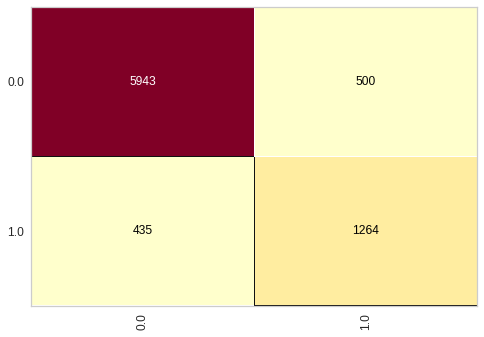

In [15]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(dt_credit)
cm.fit(X_credit_train , Y_credit_train)
cm.score(X_credit_test , Y_credit_test)

In [16]:
print(classification_report(Y_credit_test, prev))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      6443
         1.0       0.72      0.74      0.73      1699

    accuracy                           0.89      8142
   macro avg       0.82      0.83      0.83      8142
weighted avg       0.89      0.89      0.89      8142

